In [1]:
import pandas as pd
import numpy as np

# Read the datasets and merge them all

In [2]:
path = '../regressor/%s.csv'
header = ['p', 'q', 'r', 'score']

ctc_data = pd.read_csv(path % 'ctc-sp2-final-score', names=header)
blue_data = pd.read_csv(path % 'sdsc-blue-final-score', names=header)
lublin256_data = pd.read_csv(path % 'lublin-256-final-score', names=header)

In [3]:
ctc_data['from'] = 'CTC-SP2'
blue_data['from'] = 'SDSC Blue'
lublin256_data['from'] = 'Lublin 256'

In [4]:
mixed_data = pd.concat([ctc_data, blue_data, lublin256_data], ignore_index=True)
print(mixed_data)

           p    q      r     score        from
0       3143    1   2724  0.030153     CTC-SP2
1       3140    1   2864  0.041190     CTC-SP2
2       3141    1   3009  0.041148     CTC-SP2
3      20707    1   3052  0.039910     CTC-SP2
4       3158    1   3274  0.038851     CTC-SP2
...      ...  ...    ...       ...         ...
21019  12782   64  11460  0.025382  Lublin 256
21020     19    2  11494  0.024157  Lublin 256
21021   9635  130  11996  0.025708  Lublin 256
21022     35    2  12124  0.023454  Lublin 256
21023    253   16  12564  0.023329  Lublin 256

[21024 rows x 5 columns]


In [5]:
# Add a new column 'pq'
mixed_data = mixed_data.assign(pq = mixed_data['p'] * mixed_data['q'])
print(mixed_data)

           p    q      r     score        from       pq
0       3143    1   2724  0.030153     CTC-SP2     3143
1       3140    1   2864  0.041190     CTC-SP2     3140
2       3141    1   3009  0.041148     CTC-SP2     3141
3      20707    1   3052  0.039910     CTC-SP2    20707
4       3158    1   3274  0.038851     CTC-SP2     3158
...      ...  ...    ...       ...         ...      ...
21019  12782   64  11460  0.025382  Lublin 256   818048
21020     19    2  11494  0.024157  Lublin 256       38
21021   9635  130  11996  0.025708  Lublin 256  1252550
21022     35    2  12124  0.023454  Lublin 256       70
21023    253   16  12564  0.023329  Lublin 256     4048

[21024 rows x 6 columns]


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

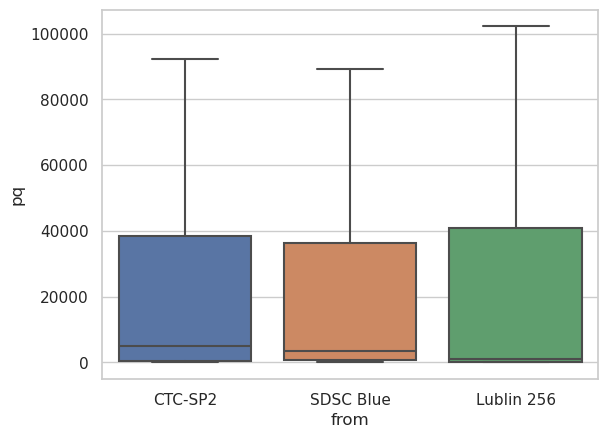

In [18]:
# Create a boxplot of the "pq" column, grouped by the "dataset" column
sns.boxplot(x='from', y='pq', data=mixed_data, showfliers = False)

plt.show()

In [8]:
mixed_data["pq"] = mixed_data["p"] * mixed_data["q"]

# Define the bins for the job size categories
bins = [0, 1000, 10000, mixed_data["pq"].max()]

# Create a new column with the job size categories
mixed_data["job_size"] = pd.cut(mixed_data["pq"], bins, labels=["small", "medium", "large"])

# Count the occurrences of each category for each workload model
mixed_data.groupby(["from", "job_size"])["job_size"].count()

from        job_size
CTC-SP2     small       1167
            medium       969
            large       1608
Lublin 256  small       7044
            medium      2088
            large       4948
SDSC Blue   small       1007
            medium       980
            large       1213
Name: job_size, dtype: int64

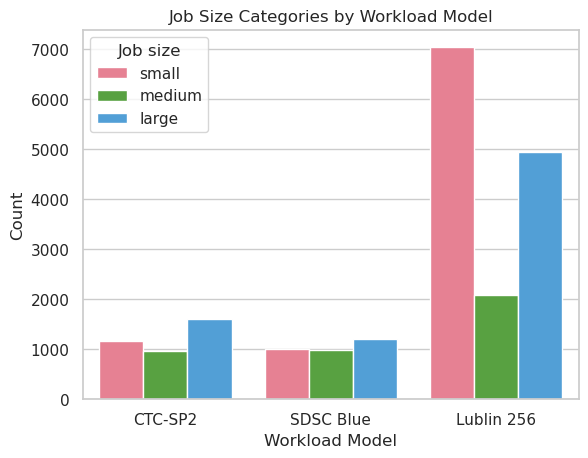

In [21]:
# Count the occurrences of each category for each workload model (using seaborn instead)
# job_size_count = mixed_data.groupby(["from", "job_size"])["job_size"].count()

# Create the bar chart
ax = sns.countplot(x='from', hue='job_size', data=mixed_data, palette=[sns.color_palette("husl")[i] for i in [0,2,4]])
plt.xlabel("Workload Model")
plt.ylabel("Count")
plt.title("Job Size Categories by Workload Model")
ax.legend(title="Job size")
# plt.xticks(rotation=45)
plt.savefig("job_size_comparison.png", dpi=300)
plt.show()